In [1]:
# Simple Car Price Prediction with RFE and VIF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load data
df = pd.read_csv('CarPrice_Assignment.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (205, 26)


In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Check missing values
print(f"Missing values: {df.isnull().sum().sum()}")

Missing values: 0


In [7]:
# Encode categorical variables
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                   'drivewheel', 'enginelocation', 'enginetype', 
                   'cylindernumber', 'fuelsystem']

In [8]:
df_clean = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

In [9]:
# Drop unnecessary columns
df_clean = df_clean.drop(['car_ID', 'CarName'], axis=1)

In [10]:
# Prepare features and target
X = df_clean.drop('price', axis=1)
y = df_clean['price']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# VIF Analysis - Remove high multicollinearity features
def calculate_vif(X_scaled, feature_names):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = feature_names
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

In [14]:
vif_results = calculate_vif(X_train_scaled, X_train.columns)
high_vif_features = vif_results[vif_results['VIF'] > 10]['Feature'].tolist()

In [15]:
if high_vif_features:
    X_train_clean = X_train.drop(columns=high_vif_features)
    X_test_clean = X_test.drop(columns=high_vif_features)
    X_train_clean_scaled = scaler.fit_transform(X_train_clean)
    X_test_clean_scaled = scaler.transform(X_test_clean)
    print(f"Removed {len(high_vif_features)} high VIF features")
else:
    X_train_clean_scaled = X_train_scaled
    X_test_clean_scaled = X_test_scaled

Removed 9 high VIF features


In [16]:
# RFE - Select best features
rfe = RFE(LinearRegression(), n_features_to_select=10)
rfe.fit(X_train_clean_scaled, y_train)
X_train_rfe = X_train_clean_scaled[:, rfe.support_]
X_test_rfe = X_test_clean_scaled[:, rfe.support_]

selected_features = X_train_clean.columns[rfe.support_].tolist()
print(f"RFE selected features: {selected_features}")

RFE selected features: ['symboling', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'carwidth', 'enginetype', 'cylindernumber', 'fuelsystem', 'stroke']


In [17]:
# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE=${rmse:,.0f}, R²={r2:.3f}")

Linear Regression: RMSE=$5,221, R²=0.655
Ridge Regression: RMSE=$5,225, R²=0.654
Lasso Regression: RMSE=$5,221, R²=0.655
Random Forest: RMSE=$4,695, R²=0.721


Text(0.5, 0, 'Price')

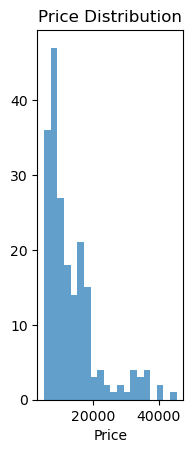

In [41]:
# Price distribution
plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=20, alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')

Text(0, 0.5, 'Price')

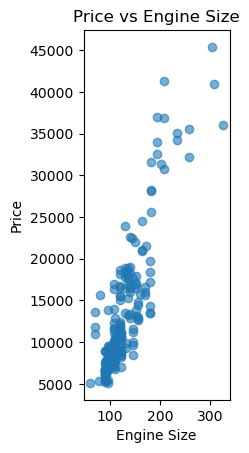

In [42]:
# Price vs key features
plt.subplot(1, 3, 2)
plt.scatter(df['enginesize'], df['price'], alpha=0.6)
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')

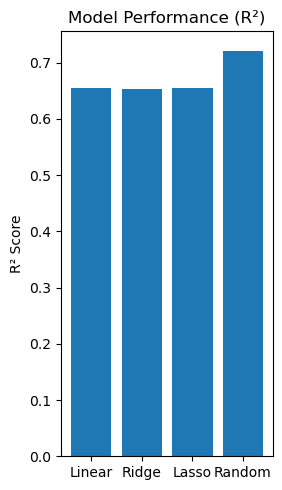

In [46]:
# Model comparison
plt.figure(figsize=(8,5))
plt.subplot(1, 3, 3)
model_names = list(results.keys())
r2_scores = [results[model]['R2'] for model in model_names]
plt.bar(range(len(model_names)), r2_scores)
plt.title('Model Performance (R²)')
plt.xticks(range(len(model_names)), [name.split()[0] for name in model_names])
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

In [47]:
# Best model
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"\nBest model: {best_model}")
print(f"R² Score: {results[best_model]['R2']:.3f}")
print(f"RMSE: ${results[best_model]['RMSE']:,.0f}")


Best model: Random Forest
R² Score: 0.721
RMSE: $4,695
